<a href="https://colab.research.google.com/github/Ukaykhingmarma28/piras/blob/main/Iras_Data_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

def show_img(image_url):
  # Fetch and display the image
  response = requests.get(image_url)
  image = Image.open(BytesIO(response.content))
  display(image)

####-Iras Data Extractor-####
Enter Student Id: 2310735
Student ID: 2310735
Student Name: Mashrur Taher
Program: Undergraduate
School: SETS
Major: Electrical and Electronic Engineering
Minor: Electronic and Telecommunication Engineering
Convocation No: 
Birth Date: 04-Oct-2004
Mobile No: +8801575083603
Credit Required: 147
Email: mashrurtaher143@gmail.com
Home Phone: 01701921388
Graduation Year/Semester: 

 Additional Details
User ID: 48416.0
User Basic ID: 0.0
Cell Phone: +8801575083603
User Name: Mashrur
First Name: Mashrur
Family Name: Taher
Title: 
Home Phone: 01701921388
Father's Email: None

--- Present Address ---
Home: House-346,Road-23,Block-G,Bashundhara R/A
Police Station: VATARA
Post Office: 1212
District: Dhaka

--- Permanent Address ---
Home: House-0147-00,Road-Kazipara ,Village-Kachua,(Ahmednagar)
Police Station: Comilla Sadar Dakshin
Post Office: 3500
District: Comilla

--- Personal Information ---
Blood Group: B+
Country: Bangladesh
Gender: M
Student Type: 0
Program ID

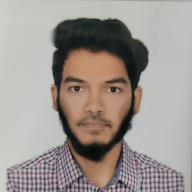

In [ ]:
import requests
import json
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

auth_tok =""
def get_auth_tok():
  global auth_tok
  # std_id = input("Enter Iras ID: ")
  std_id = "2430825"
  password = "9OAN0r8tn18c4G19vmR/UA=="

  url = "https://iras.iub.edu.bd:8079//v3/account/token"
  headers = {
      'origin': 'http://irasv1.iub.edu.bd',
      'referer': 'http://irasv1.iub.edu.bd/',
      'host': 'iras.iub.edu.bd:8079'
  }
  body = {
        "email": f"{std_id}",
        "password": f"{password}"
      }
  response = requests.post(url, headers=headers, json=body)
  json_data = response.json()
  data = json_data['data']
  auth_tok = data[0].get('access_token')
  # print(auth_tok)

def show_img(image_url):
  # Fetch and display the image
  response = requests.get(image_url)
  image = Image.open(BytesIO(response.content))
  display(image)

def get_std_id_info(id):
  global auth_tok
  if not auth_tok:
    get_auth_tok()
  std_id = id
  # https://iras.iub.edu.bd:8079/api/v1/graduation-service/student-contact/2430825
  # https://iras.iub.edu.bd:8079/api/v2/profile/{std_id}/load-student-details
  url = f"https://iras.iub.edu.bd:8079/api/v1/graduation-service/student-contact/{std_id}"
  headers = {
    'origin': 'https://irasv1.iub.edu.bd',
    'referer': 'https://irasv1.iub.edu.bd/',
    'host': 'iras.iub.edu.bd:8079',
    'Authorization': f'Bearer { auth_tok}',
    }

  response = requests.get(url, headers=headers)
  data = response.json().get('data')
  # print(data)
  data = data[0]
  '''
  "studentId": "2430825",
  "studentName": "Mohammad Zaid Iqbal  Fahad",
  "program": "Undergraduate",
  "school": "SETS",
  "major": "Computer Science and Engineering",
  "minor": "",
  "convocationNo": "",
  "birthDate": "28-Aug-2003",
  "mobileNo": "+8801627939394",
  "creditRequired": "143",
  "email": "mr.razib@gmail.com",
  "homePhone": "01673312706",
  "graduationYS": ""
  '''
  std_id = data.get('studentId')
  std_name = data.get('studentName')
  program = data.get('program')
  school = data.get('school')
  major = data.get('major')
  minor = data.get('minor')
  convocation_no = data.get('convocationNo')
  birth_date = data.get('birthDate')
  mobile_no = data.get('mobileNo')
  credit_required = data.get('creditRequired')
  email = data.get('email')
  home_phone = data.get('homePhone')
  graduation_ys = data.get('graduationYS')

  print(f"Student ID: {std_id}")
  print(f"Student Name: {std_name}")
  print(f"Program: {program}")
  print(f"School: {school}")
  print(f"Major: {major}")
  print(f"Minor: {minor}")
  print(f"Convocation No: {convocation_no}")
  print(f"Birth Date: {birth_date}")
  print(f"Mobile No: {mobile_no}")
  print(f"Credit Required: {credit_required}")
  print(f"Email: {email}")
  print(f"Home Phone: {home_phone}")
  print(f"Graduation Year/Semester: {graduation_ys}")

  return email

def get_std_email_info(email):
  global auth_tok
  if not auth_tok:
    get_auth_tok()
  std_id = id
  # https://iras.iub.edu.bd:8079/api/v1/graduation-service/student-contact/2430825
  # https://iras.iub.edu.bd:8079/api/v2/admission/registrared/mr.razib@gmail.com/load-student-information
  url = f"https://iras.iub.edu.bd:8079/api/v2/admission/registrared/{email}/load-student-information"
  base_url = "https://iras.iub.edu.bd:8079/"
  headers = {
    'origin': 'https://irasv1.iub.edu.bd',
    'referer': 'https://irasv1.iub.edu.bd/',
    'host': 'iras.iub.edu.bd:8079',
    'Authorization': f'Bearer { auth_tok}',
    }

  response = requests.get(url, headers=headers)
  data = response.json().get('data')

  '''
  data = {
    "userId": 55311.0,
    "userBasicId": 0.0,
    "cellPhone": "+8801627939394",
    "userName": "Mohammad Zaid Iqbal",
    "firstName": "Mohammad Zaid Iqbal",
    "familyName": "Fahad",
    "title": "",
    "homePhone": "01673312706",
    "fatherEmail": "mr.razib@gmail.com",
    "preHome": "House 61, Road 11, Sector 13",
    "prePoliceStattion": "162",
    "prePoliceStattionName": "Uttara  Paschim",
    "prePostOffice": "Uttara Model TwonTSO - 1230",
    "prehomeDistrict": "1013",
    "prehomeDistrictName": "Dhaka",
    "perHome": "House 61, Road 11, Sector 13",
    "perPoliceStattion": "162",
    "perPoliceStattionName": "Uttara  Paschim",
    "perPostOffice": "Uttara Model TwonTSO - 1230",
    "perhomeDistrict": "1013",
    "perhomeDistrictName": "Dhaka",
    "bloodGroup": "B+",
    "countryCode": "119",
    "countryName": "Bangladesh",
    "countryOfBirthName": "",
    "countryOfCitizenName": "",
    "additionalCitizenshipName": "",
    "countryOfPassportIssuanceName": "",
    "gender": "M",
    "studentType": 0,
    "programId": 1,
    "firstMajor": "0002",
    "degreeId": "0002",
    "dateOfBirth": "2003-08-28T00:00:00Z",
    "isDegreePlanFill": "N",
    "photoPath": "~/ImageStorage/Photo/Admission/20242/55311.jpg",
    "admitCardPrintStatus": False,
    "nid": "2864933326",
    "birthCertificateNo": "20032692527048547",
    "admittedToIUBYn": 0,
    "arrowsStatus": 0,
    "disabilityDetails": [],
    "domainStatusYn": 0,
    "guarantorFirstName": "Mohammad Salahuddin",
    "guarantorLastName": "Razib",
    "guarantorRelation": "Father",
    "guarantorOccupation": "Govt. Service",
    "guarantorHomePhone": "01673312705",
    "guarantorEmail": "mr.razib@gmail.com",
    "userEmail": "mr.razib@gmail.com",
    "guarantorPermanentAddress": "House 61, Road 11, Sector 13Post:  Uttara Model TwonTSO - 1230  Thana :Uttara  Paschim  Dist  :Dhaka",
    "fatherFirstName": "Mohammad Salahuddin",
    "fatherLastName": "Razib",
    "motherFirstName": "Farzana Ahmed",
    "motherLastName": "Koel",
    "guarantorMonthlyIncome": 80000.0,
    "guarantorIDType": 1,
    "guarantorNID": "2619551168163",
    "guarantorDOB": "1978-01-18T00:00:00Z"
}
  '''
  # Extracting values into variables
  user_id = data.get('userId')
  basic_id = data.get('userBasicId')
  cell_phone = data.get('cellPhone')
  user_name = data.get('userName')
  first_name = data.get('firstName')
  family_name = data.get('familyName')
  title = data.get('title')
  home_phone = data.get('homePhone')
  father_email = data.get('fatherEmail')

  present_home = data.get('preHome')
  present_police_station = data.get('prePoliceStattionName')
  present_post_office = data.get('prePostOffice')
  present_district = data.get('prehomeDistrictName')

  permanent_home = data.get('perHome')
  permanent_police_station = data.get('perPoliceStattionName')
  permanent_post_office = data.get('perPostOffice')
  permanent_district = data.get('perhomeDistrictName')

  blood_group = data.get('bloodGroup')
  country_name = data.get('countryName')
  gender = data.get('gender')
  student_type = data.get('studentType')
  program_id = data.get('programId')
  first_major = data.get('firstMajor')
  degree_id = data.get('degreeId')
  dob = data.get('dateOfBirth')
  photo_path = data.get('photoPath')
  photo_url = photo_path.replace("~", base_url)

  nid = data.get('nid')
  birth_certificate_no = data.get('birthCertificateNo')

  guarantor_first_name = data.get('guarantorFirstName')
  guarantor_last_name = data.get('guarantorLastName')
  guarantor_relation = data.get('guarantorRelation')
  guarantor_occupation = data.get('guarantorOccupation')
  guarantor_home_phone = data.get('guarantorHomePhone')
  guarantor_email = data.get('guarantorEmail')
  guarantor_permanent_address = data.get('guarantorPermanentAddress')
  guarantor_monthly_income = data.get('guarantorMonthlyIncome')
  guarantor_id_type = data.get('guarantorIDType')
  guarantor_nid = data.get('guarantorNID')
  guarantor_dob = data.get('guarantorDOB')

  father_first_name = data.get('fatherFirstName')
  father_last_name = data.get('fatherLastName')
  mother_first_name = data.get('motherFirstName')
  mother_last_name = data.get('motherLastName')

  # Printing the values with labels
  print(f"User ID: {user_id}")
  print(f"User Basic ID: {basic_id}")
  print(f"Cell Phone: {cell_phone}")
  print(f"User Name: {user_name}")
  print(f"First Name: {first_name}")
  print(f"Family Name: {family_name}")
  print(f"Title: {title}")
  print(f"Home Phone: {home_phone}")
  print(f"Father's Email: {father_email}")

  print("\n--- Present Address ---")
  print(f"Home: {present_home}")
  print(f"Police Station: {present_police_station}")
  print(f"Post Office: {present_post_office}")
  print(f"District: {present_district}")

  print("\n--- Permanent Address ---")
  print(f"Home: {permanent_home}")
  print(f"Police Station: {permanent_police_station}")
  print(f"Post Office: {permanent_post_office}")
  print(f"District: {permanent_district}")

  print("\n--- Personal Information ---")
  print(f"Blood Group: {blood_group}")
  print(f"Country: {country_name}")
  print(f"Gender: {gender}")
  print(f"Student Type: {student_type}")
  print(f"Program ID: {program_id}")
  print(f"First Major: {first_major}")
  print(f"Degree ID: {degree_id}")
  print(f"Date of Birth: {dob}")
  print(f"Photo Path: {photo_path}")
  print(f"Photo Link: {photo_url}")


  print("\n--- Identification Details ---")
  print(f"NID: {nid}")
  print(f"Birth Certificate No: {birth_certificate_no}")

  print("\n--- Guarantor Details ---")
  print(f"Guarantor First Name: {guarantor_first_name}")
  print(f"Guarantor Last Name: {guarantor_last_name}")
  print(f"Guarantor Relation: {guarantor_relation}")
  print(f"Guarantor Occupation: {guarantor_occupation}")
  print(f"Guarantor Home Phone: {guarantor_home_phone}")
  print(f"Guarantor Email: {guarantor_email}")
  print(f"Guarantor Permanent Address: {guarantor_permanent_address}")
  print(f"Guarantor Monthly Income: {guarantor_monthly_income}")
  print(f"Guarantor ID Type: {guarantor_id_type}")
  print(f"Guarantor NID: {guarantor_nid}")
  print(f"Guarantor Date of Birth: {guarantor_dob}")

  print("\n--- Parents Details ---")
  print(f"Father's First Name: {father_first_name}")
  print(f"Father's Last Name: {father_last_name}")
  print(f"Mother's First Name: {mother_first_name}")
  print(f"Mother's Last Name: {mother_last_name}")

  return photo_url


print("####-Iras Data Extractor-####")
sid = input("Enter Student Id: ")
email = get_std_id_info(sid)
print("\n Additional Details")
photo_url = get_std_email_info(email)
show_img(photo_url)

In [ ]:
import requests
import json

auth_tok =""
def get_auth_tok():
  global auth_tok
  # std_id = input("Enter Iras ID: ")
  std_id = "2430825"
  password = "9OAN0r8tn18c4G19vmR/UA=="

  url = "https://iras.iub.edu.bd:8079//v3/account/token"
  headers = {
      'origin': 'http://irasv1.iub.edu.bd',
      'referer': 'http://irasv1.iub.edu.bd/',
      'host': 'iras.iub.edu.bd:8079'
  }
  body = {
        "email": f"{std_id}",
        "password": f"{password}"
      }
  response = requests.post(url, headers=headers, json=body)
  json_data = response.json()
  data = json_data['data']
  auth_tok = data[0].get('access_token')
  # print(auth_tok)

def get_std_id_info(id):
  global auth_tok
  if not auth_tok:
    get_auth_tok()
  std_id = id
  # https://iras.iub.edu.bd:8079/api/v1/graduation-service/student-contact/2430825
  # https://iras.iub.edu.bd:8079/api/v2/profile/{std_id}/load-student-details
  url = f"https://iras.iub.edu.bd:8079/api/v2/profile/{std_id}/load-student-details"
  headers = {
    'origin': 'https://irasv1.iub.edu.bd',
    'referer': 'https://irasv1.iub.edu.bd/',
    'host': 'iras.iub.edu.bd:8079',

    }

  response = requests.get(url, headers=headers)
  data = response.json().get('data')
  # print(data)
  # data = data[0]
  '''
    data =
    "studentId": "2430825",
    "studentName": "Mohammad Zaid Iqbal Fahad",
    "cgpa": 3.33,
    "earnedCredit": 22.0,
    "degreeName": " in Computer Science and Engineering",
    "departmentName": "Computer Science and Engineering",
    "schoolName": "School of Engineering, Technology and Sciences",
    "firstMajor": "Computer Science and Engineering",
    "secondMajor": "",
    "minor": "",
    "fathersFirstName": "Mohammad Salahuddin",
    "fathersLastName": "Razib",
    "fathersName": "Mohammad Salahuddin Razib",
    "mothersName": "Farzana Ahmed Koel",
    "mothersFirstName": "Farzana Ahmed",
    "mothersLastName": "Koel",
    "presentAddess": "House 61, Road 11, Sector 13Post:  Uttara Model TwonTSO - 1230  Thana :Uttara  Paschim  Dist  :Dhaka",
    "permanentAddess": "",
    "cellPhone": "+8801627939394",
    "email": "mr.razib@gmail.com",
    "sex": "Male",
    "dob": "28/08/2003",
    "maritalStatus": "",
    "country": "",
    "bloodGroup": "B+",
    "admissionDate": "04-Apr-2024",
    "graduationDate": "",
    "religion": "",
    "nid": "00000000000",
    "passportNo": "",
    "birthRegistrationNo": ""
  '''

  # Extracting values into variables
  std_id = data.get('studentId')
  std_name = data.get('studentName')
  cgpa = data.get('cgpa')
  earned_credit = data.get('earnedCredit')
  degree_name = data.get('degreeName')
  department_name = data.get('departmentName')
  school_name = data.get('schoolName')
  first_major = data.get('firstMajor')
  second_major = data.get('secondMajor')
  minor = data.get('minor')

  father_name = data.get('fathersName')
  father_first_name = data.get('fathersFirstName')
  father_last_name = data.get('fathersLastName')

  mother_name = data.get('mothersName')
  mother_first_name = data.get('mothersFirstName')
  mother_last_name = data.get('mothersLastName')

  present_address = data.get('presentAddess')
  permanent_address = data.get('permanentAddess')
  cell_phone = data.get('cellPhone')
  email = data.get('email')
  sex = data.get('sex')
  dob = data.get('dob')

  marital_status = data.get('maritalStatus')
  country = data.get('country')
  blood_group = data.get('bloodGroup')
  admission_date = data.get('admissionDate')
  graduation_date = data.get('graduationDate')
  religion = data.get('religion')

  nid = data.get('nid')
  passport_no = data.get('passportNo')
  birth_registration_no = data.get('birthRegistrationNo')

  # Printing the values with labels
  print("####-Academic Info-####")

  print(f"Student ID: {std_id}")
  print(f"Student Name: {std_name}")
  print(f"Gender: {sex}")
  print(f"CGPA: {cgpa}")
  print(f"Earned Credit: {earned_credit}")
  print(f"Degree Name: {degree_name}")
  print(f"Department Name: {department_name}")
  print(f"School Name: {school_name}")
  print(f"First Major: {first_major}")
  print(f"Second Major: {second_major}")
  print(f"Minor: {minor}")
  print(f"Admission Date: {admission_date}")
  print(f"Graduation Date: {graduation_date}")

  print()
  print("####-Family Info-####")
  print(f"Father's Name: {father_name}")
  # print(f"Father's First Name: {father_first_name}")
  # print(f"Father's Last Name: {father_last_name}")

  print(f"Mother's Name: {mother_name}")
  # print(f"Mother's First Name: {mother_first_name}")
  # print(f"Mother's Last Name: {mother_last_name}")
  print()
  print("####-Personal Info-####")
  print(f"Student Name: {std_name}")
  print(f"Sex: {sex}")
  print(f"Date of Birth: {dob}")
  print(f"Marital Status: {marital_status}")
  print(f"Blood Group: {blood_group}")
  print(f"Religion: {religion}")
  print()
  print("####-Contact Info-####")
  print(f"Present Address: {present_address}")
  print(f"Permanent Address: {permanent_address}")
  print(f"Country: {country}")
  print(f"Cell Phone: {cell_phone}")
  print(f"Email: {email}")

  print(f"NID: {nid}")
  print(f"Passport No: {passport_no}")
  print(f"Birth Registration No: {birth_registration_no}")


  return email

def get_std_email_info(email):
  global auth_tok
  if not auth_tok:
    get_auth_tok()
  std_id = id
  # https://iras.iub.edu.bd:8079/api/v1/graduation-service/student-contact/2430825
  # https://iras.iub.edu.bd:8079/api/v2/admission/registrared/mr.razib@gmail.com/load-student-information
  url = f"https://iras.iub.edu.bd:8079/api/v2/admission/registrared/{email}/load-student-information"
  base_url = "https://iras.iub.edu.bd:8079/"
  headers = {
    'origin': 'https://irasv1.iub.edu.bd',
    'referer': 'https://irasv1.iub.edu.bd/',
    'host': 'iras.iub.edu.bd:8079',
    'Authorization': f'Bearer { auth_tok}',

    }

  response = requests.get(url, headers=headers)
  data = response.json().get('data')

  '''
  data = {
    "userId": 55311.0,
    "userBasicId": 0.0,
    "cellPhone": "+8801627939394",
    "userName": "Mohammad Zaid Iqbal",
    "firstName": "Mohammad Zaid Iqbal",
    "familyName": "Fahad",
    "title": "",
    "homePhone": "01673312706",
    "fatherEmail": "mr.razib@gmail.com",
    "preHome": "House 61, Road 11, Sector 13",
    "prePoliceStattion": "162",
    "prePoliceStattionName": "Uttara  Paschim",
    "prePostOffice": "Uttara Model TwonTSO - 1230",
    "prehomeDistrict": "1013",
    "prehomeDistrictName": "Dhaka",
    "perHome": "House 61, Road 11, Sector 13",
    "perPoliceStattion": "162",
    "perPoliceStattionName": "Uttara  Paschim",
    "perPostOffice": "Uttara Model TwonTSO - 1230",
    "perhomeDistrict": "1013",
    "perhomeDistrictName": "Dhaka",
    "bloodGroup": "B+",
    "countryCode": "119",
    "countryName": "Bangladesh",
    "countryOfBirthName": "",
    "countryOfCitizenName": "",
    "additionalCitizenshipName": "",
    "countryOfPassportIssuanceName": "",
    "gender": "M",
    "studentType": 0,
    "programId": 1,
    "firstMajor": "0002",
    "degreeId": "0002",
    "dateOfBirth": "2003-08-28T00:00:00Z",
    "isDegreePlanFill": "N",
    "photoPath": "~/ImageStorage/Photo/Admission/20242/55311.jpg",
    "admitCardPrintStatus": False,
    "nid": "2864933326",
    "birthCertificateNo": "20032692527048547",
    "admittedToIUBYn": 0,
    "arrowsStatus": 0,
    "disabilityDetails": [],
    "domainStatusYn": 0,
    "guarantorFirstName": "Mohammad Salahuddin",
    "guarantorLastName": "Razib",
    "guarantorRelation": "Father",
    "guarantorOccupation": "Govt. Service",
    "guarantorHomePhone": "01673312705",
    "guarantorEmail": "mr.razib@gmail.com",
    "userEmail": "mr.razib@gmail.com",
    "guarantorPermanentAddress": "House 61, Road 11, Sector 13Post:  Uttara Model TwonTSO - 1230  Thana :Uttara  Paschim  Dist  :Dhaka",
    "fatherFirstName": "Mohammad Salahuddin",
    "fatherLastName": "Razib",
    "motherFirstName": "Farzana Ahmed",
    "motherLastName": "Koel",
    "guarantorMonthlyIncome": 80000.0,
    "guarantorIDType": 1,
    "guarantorNID": "2619551168163",
    "guarantorDOB": "1978-01-18T00:00:00Z"
}
  '''
  # Extracting values into variables
  user_id = data.get('userId')
  basic_id = data.get('userBasicId')
  cell_phone = data.get('cellPhone')
  user_name = data.get('userName')
  first_name = data.get('firstName')
  family_name = data.get('familyName')
  title = data.get('title')
  home_phone = data.get('homePhone')
  father_email = data.get('fatherEmail')

  present_home = data.get('preHome')
  present_police_station = data.get('prePoliceStattionName')
  present_post_office = data.get('prePostOffice')
  present_district = data.get('prehomeDistrictName')

  permanent_home = data.get('perHome')
  permanent_police_station = data.get('perPoliceStattionName')
  permanent_post_office = data.get('perPostOffice')
  permanent_district = data.get('perhomeDistrictName')

  blood_group = data.get('bloodGroup')
  country_name = data.get('countryName')
  gender = data.get('gender')
  student_type = data.get('studentType')
  program_id = data.get('programId')
  first_major = data.get('firstMajor')
  degree_id = data.get('degreeId')
  dob = data.get('dateOfBirth')
  photo_path = data.get('photoPath')
  photo_url = photo_path.replace("~", base_url)

  nid = data.get('nid')
  birth_certificate_no = data.get('birthCertificateNo')

  guarantor_first_name = data.get('guarantorFirstName')
  guarantor_last_name = data.get('guarantorLastName')
  guarantor_relation = data.get('guarantorRelation')
  guarantor_occupation = data.get('guarantorOccupation')
  guarantor_home_phone = data.get('guarantorHomePhone')
  guarantor_email = data.get('guarantorEmail')
  guarantor_permanent_address = data.get('guarantorPermanentAddress')
  guarantor_monthly_income = data.get('guarantorMonthlyIncome')
  guarantor_id_type = data.get('guarantorIDType')
  guarantor_nid = data.get('guarantorNID')
  guarantor_dob = data.get('guarantorDOB')

  father_first_name = data.get('fatherFirstName')
  father_last_name = data.get('fatherLastName')
  mother_first_name = data.get('motherFirstName')
  mother_last_name = data.get('motherLastName')

  # Printing the values with labels
  print(f"User ID: {user_id}")
  print(f"User Basic ID: {basic_id}")
  print(f"Cell Phone: {cell_phone}")
  print(f"User Name: {user_name}")
  print(f"First Name: {first_name}")
  print(f"Family Name: {family_name}")
  print(f"Title: {title}")
  print(f"Home Phone: {home_phone}")
  print(f"Father's Email: {father_email}")

  print("\n--- Present Address ---")
  print(f"Home: {present_home}")
  print(f"Police Station: {present_police_station}")
  print(f"Post Office: {present_post_office}")
  print(f"District: {present_district}")

  print("\n--- Permanent Address ---")
  print(f"Home: {permanent_home}")
  print(f"Police Station: {permanent_police_station}")
  print(f"Post Office: {permanent_post_office}")
  print(f"District: {permanent_district}")

  print("\n--- Personal Information ---")
  print(f"Blood Group: {blood_group}")
  print(f"Country: {country_name}")
  print(f"Gender: {gender}")
  print(f"Student Type: {student_type}")
  print(f"Program ID: {program_id}")
  print(f"First Major: {first_major}")
  print(f"Degree ID: {degree_id}")
  print(f"Date of Birth: {dob}")
  print(f"Photo Path: {photo_path}")
  print(f"Photo Link: {photo_url}")


  print("\n--- Identification Details ---")
  print(f"NID: {nid}")
  print(f"Birth Certificate No: {birth_certificate_no}")

  print("\n--- Guarantor Details ---")
  print(f"Guarantor First Name: {guarantor_first_name}")
  print(f"Guarantor Last Name: {guarantor_last_name}")
  print(f"Guarantor Relation: {guarantor_relation}")
  print(f"Guarantor Occupation: {guarantor_occupation}")
  print(f"Guarantor Home Phone: {guarantor_home_phone}")
  print(f"Guarantor Email: {guarantor_email}")
  print(f"Guarantor Permanent Address: {guarantor_permanent_address}")
  print(f"Guarantor Monthly Income: {guarantor_monthly_income}")
  print(f"Guarantor ID Type: {guarantor_id_type}")
  print(f"Guarantor NID: {guarantor_nid}")
  print(f"Guarantor Date of Birth: {guarantor_dob}")

  print("\n--- Parents Details ---")
  print(f"Father's First Name: {father_first_name}")
  print(f"Father's Last Name: {father_last_name}")
  print(f"Mother's First Name: {mother_first_name}")
  print(f"Mother's Last Name: {mother_last_name}")


id= input("Enter Id")
email = get_std_id_info(id)
print("\n Additional Details")
get_std_email_info(email)

Enter Id2432179
####-Academic Info-####
Student ID: 2432179
Student Name: Nadifa Jahan
Gender: Female
CGPA: 3.0
Earned Credit: 9.0
Degree Name:  in Biochemistry and Biotechnology
Department Name: Life Science
School Name: School of Environment And Life Sciences
First Major: Biochemistry and Biotechnology
Second Major: 
Minor: 
Admission Date: 06-May-2024
Graduation Date: 

####-Family Info-####
Father's Name: Mostak Ahmed
Mother's Name: Taslima Akter

####-Personal Info-####
Student Name: Nadifa Jahan
Sex: Female
Date of Birth: 13/12/2004
Marital Status: 
Blood Group: B+
Religion: 

####-Contact Info-####
Present Address: Tarati/85,03Post:  Chandura  Thana :Ishwarganj  Dist  :Mymensingh
Permanent Address: 
Country: 
Cell Phone: +8801996421181
Email: ajairaami45@gmail.com
NID: 
Passport No: 
Birth Registration No: 

 Additional Details
User ID: 64053.0
User Basic ID: 0.0
Cell Phone: +8801996421181
User Name: Nadifa
First Name: Nadifa
Family Name: Jahan
Title: 
Home Phone: 01714244179
Fa